C:\Users\sdeherto\.conda\envs\pyvis\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Users\sdeherto\.conda\envs\pyvis\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Users\sdeherto\.conda\envs\pyvis\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Users\sdeherto\.conda\envs\pyvis\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


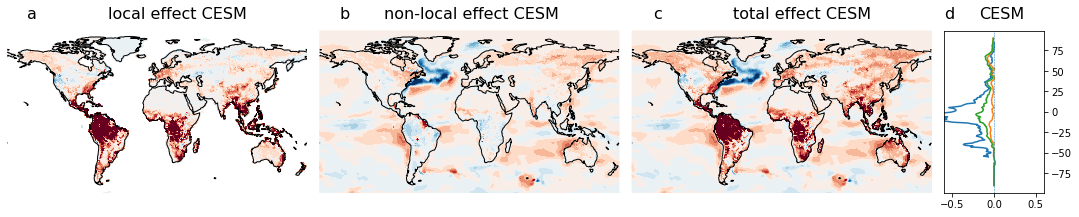

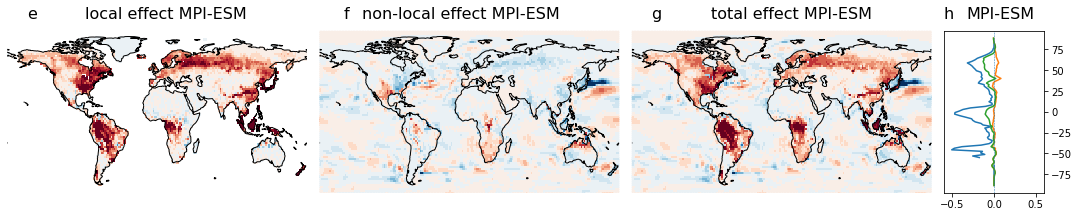

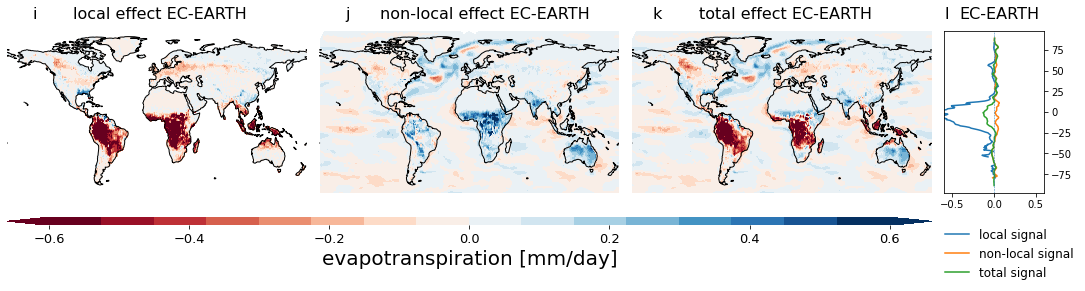

In [3]:


import numpy as np
import os 
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
#from netCDF4 import Dataset as NetCDFFile 
import cartopy.crs as ccrs
import matplotlib.colors as colors
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import mplotutils as mpu

#add panel labels and model names         ax[j-1].text(0.1, 1.15, P_list[j-1], transform=ax.transAxes,fontsize=16, fontweight='bold', va='top', ha='right')

outdir=r'C:/Users/sdeherto/OneDrive - Vrije Universiteit Brussel/phd/LAMACLIMA/wam_data/new/signal_seperated/'
#title='2m air temperature'
plt.rcParams['figure.figsize'] = [18, 7.5]
#matplotlib.rc('xtick', labelsize=20) 
#matplotlib.rc('ytick', labelsize=20) 
mpl.rc('axes',edgecolor='none')
l_vapo = 2450000 #Latent heat of vaporization (J/kg)
outdir=r'C:/Users/sdeherto/OneDrive - Vrije Universiteit Brussel/phd/LAMACLIMA/wam_data/new/signal_seperated/'

case='crop-ctl'
season=False 
sensitivity=False
level='none'
relative=False 
vlims=[-0.6,0.6]
lat_lims=[-0.6,0.6]
model_list=['cesm', 'mpiesm','ecearth']
var_list=['LHFLX','hfls','slhf']

cmor_list=['Amon','Amon','Amon']
#unit='W/m$^{2}$'
unit='mm/day'
label='evapotranspiration'
#nit='/ '
#unit='m$^{-2}$/m$^{-2}$'

lsm_data_CESM = r'C:/Users/sdeherto/OneDrive - Vrije Universiteit Brussel/phd/LAMACLIMA/wam_data/cesm/landmask_cesm.nc'
ds_mask = xr.open_dataset(lsm_data_CESM)
da_mask=ds_mask['landmask']  
  
lsm_data_MPIESM = r'C:/Users/sdeherto/OneDrive - Vrije Universiteit Brussel/phd/LAMACLIMA/wam_data/mpiesm/landmask_mpiesm.nc'# insert landseamask here
ds_mask = xr.open_dataset(lsm_data_MPIESM)
da_mask_mpi=ds_mask['landmask']  
da_mask_mpi=np.flipud(da_mask_mpi)

lsm_data_EC = r'C:/Users/sdeherto/OneDrive - Vrije Universiteit Brussel/phd/LAMACLIMA/wam_data/ecearth/interpolated_ec-earth_land_sea_mask.nc'# insert landseamask here
ds_mask = xr.open_dataset(lsm_data_EC)
da_mask_ec=ds_mask['mask']  

masks=[da_mask,da_mask_mpi,da_mask_ec]
k=0
for model in model_list:
    k=k+1
    if model=='cesm':
        var=var_list[0]
        cmor_table=cmor_list[0]
        mask_local=masks[0]
    elif model=='mpiesm':
        var=var_list[1]
        cmor_table=cmor_list[1]
        mask_local=masks[1]
    elif model=='ecearth':
        var=var_list[2]
        cmor_table=cmor_list[2]
        mask_local=masks[2]


    varname=var
    var_local=var+'_local'
    var_nonlocal=var+'_nonlocal'
    var_total=var+'_total'

    tseriesdir= outdir + '/'+model+'/'
    fn=varname + '_' + case +'_' + model + '_timmean_signal-separated.nc'
    if model=='ecearth':
        fn= 'interped_'+varname + '_' + case +'_' + model + '_ymonmean000004_signal-separated.nc'
    ds = xr.open_dataset(tseriesdir+fn)
    da_local=ds[var_local].mean('time')
    da_nonlocal=ds[var_nonlocal].mean('time')
    da_total=ds[var_total].mean('time')
    
    if model=='mpiesm':
        mask_local=xr.DataArray(mask_local,coords=(da_local.lat,da_local.lon)) 
    i=0
    j=0
    ############ define the projection,
    #f, ax = plt.subplots(2,2)
    fig = plt.figure()
    gs = fig.add_gridspec(3,4,width_ratios=[3,3,3,1])
    label_list=['a','b','c','d','e','f','g','h','i','j','k','l']
    if model=='ecearth':
            da_local=xr.where(mask_local==1,da_local,np.nan)
    if model=='ecearth' and var =='slhf':
            da_local=da_local/(3*3600)/(l_vapo*1000)*1000*3600*24
            da_nonlocal=da_nonlocal/(3*3600)/(l_vapo*1000)*1000*3600*24
            da_total=da_total/(3*3600)/(l_vapo*1000)*1000*3600*24
    if model=='mpiesm' and var =='hfls':
            da_local=da_local/(l_vapo*1000)*1000*3600*24
            da_nonlocal=da_nonlocal/(l_vapo*1000)*1000*3600*24
            da_total=da_total/(l_vapo*1000)*1000*3600*24
    if model=='cesm' and var =='LHFLX':
            da_local=da_local/(l_vapo*1000)*1000*3600*24
            da_nonlocal=da_nonlocal/(l_vapo*1000)*1000*3600*24
            da_total=da_total/(l_vapo*1000)*1000*3600*24
            
    name = da_total.name
    for da in [da_local, da_nonlocal, da_total]:
        cmap = 'RdBu'
        i=i+1
    #     da_mean=xr.where(da_mask==1,da_mean,0)
        if vlims==False:
                plot_lims = [da.min(), da.max()]
        else:
                plot_lims = [vlims[0],vlims[1]]
    # define colorbar levels
        ax = fig.add_subplot(gs[k-1,j], projection=ccrs.PlateCarree())
        levels = np.arange(plot_lims[0], plot_lims[1]+20, 20)
        levels=[-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2]
    # define colormap (more info on colormaps: https://matplotlib.org/users/colormaps.html)

          #cmap, norm = mpu.from_levels_and_cmap(levels, 'RdBu_r', extend='both')
        cbar_label = unit

           # add the coastlines to the plot

        ax.coastlines()
        # plot data array as a map, with the previously defined argumnets
        h=da.plot(ax=ax, cmap=plt.cm.get_cmap(cmap, 16), vmin=plot_lims[0], vmax=plot_lims[1], add_colorbar=False)
        # plot the colorbar with all predefined arguments
        if plot_lims[0]>da.min() and plot_lims[1]<da.max():
            extend='both'
        elif plot_lims[0]>da.min() and plot_lims[1]> da.max():
            extend='min'
        elif plot_lims[0]<da.min() and plot_lims[1]<da.max():
            extend='max'
        else:
            extend='neither'
        if k==1:
            if i==1:
                cesm_local_extend=extend
                ax.set_ylabel(model)
            elif i==2:
                cesm_nonlocal_extend=extend
            elif i==3:
                cesm_total_extend=extend
        elif k==2:
            if i==1:
                mpiesm_local_extend=extend
            elif i==2:
                mpiesm_nonlocal_extend=extend
            elif i==3:
                mpiesm_total_extend=extend
        elif k==3:
            if i==1:
                ecearth_local_extend=extend
            elif i==2:
                ecearth_nonlocal_extend=extend
            elif i==3:
                ecearth_total_extend=extend
        #if j==4:
        #cbar   = fig.colorbar(h, ax=ax, cmap=cmap,spacing='uniform',orientation='horizontal',label = cbar_label,pad = 0.05,extend=extend)
        #extend='both'
          # add the title
        #ax.set_title(title)
          # adjust colorbar extent to axes extent

        ax.set_aspect('auto')
     # set the extent of the cartopy geoAxes to \"global\"
          #ax.set_global()

          # or alternatively, if you want to plot a certain region, use (example: Europe)
        ax.set_extent([-180, 180, -63, 89], ccrs.PlateCarree())

        levels = [0, 3.2, 5]
        if i==1:
            ax_1=ax
            if model=='cesm':
                ax.text(0.1, 1.15, 'a', transform=ax.transAxes,fontsize=16, va='top', ha='right')
                ax.text(0.8, 1.15, 'local effect CESM', transform=ax.transAxes,fontsize=16, va='top', ha='right')
            elif model=='mpiesm':
                ax.text(0.1, 1.15, 'e', transform=ax.transAxes,fontsize=16, va='top', ha='right')
                ax.text(0.8, 1.15, 'local effect MPI-ESM', transform=ax.transAxes,fontsize=16, va='top', ha='right')
            elif model=='ecearth':
                ax.text(0.1, 1.15, 'i', transform=ax.transAxes,fontsize=16, va='top', ha='right')
                ax.text(0.8, 1.15, 'local effect EC-EARTH', transform=ax.transAxes,fontsize=16, va='top', ha='right')
            
        elif i==2:
            if model=='cesm':
                ax.text(0.1, 1.15, 'b', transform=ax.transAxes,fontsize=16, va='top', ha='right')
                ax.text(0.8, 1.15, 'non-local effect CESM', transform=ax.transAxes,fontsize=16, va='top', ha='right')

            elif model=='mpiesm':
                ax.text(0.1, 1.15, 'f', transform=ax.transAxes,fontsize=16,va='top', ha='right')
                ax.text(0.8, 1.15, 'non-local effect MPI-ESM', transform=ax.transAxes,fontsize=16, va='top', ha='right')
            elif model=='ecearth':
                ax.text(0.1, 1.15, 'j', transform=ax.transAxes,fontsize=16,va='top', ha='right')
                ax.text(0.9, 1.15, 'non-local effect EC-EARTH', transform=ax.transAxes,fontsize=16, va='top', ha='right')
        elif i==3:
            if model=='cesm':
                ax.text(0.1, 1.15, 'c', transform=ax.transAxes,fontsize=16, va='top', ha='right')
                ax.text(0.8, 1.15, 'total effect CESM', transform=ax.transAxes,fontsize=16, va='top', ha='right')

            elif model=='mpiesm':
                ax.text(0.1, 1.15, 'g', transform=ax.transAxes,fontsize=16, va='top', ha='right')
                ax.text(0.8, 1.15, 'total effect MPI-ESM', transform=ax.transAxes,fontsize=16, va='top', ha='right')
            elif model=='ecearth':
                ax.text(0.1, 1.15, 'k', transform=ax.transAxes,fontsize=16, va='top', ha='right')
                ax.text(0.8, 1.15, 'total effect EC-EARTH', transform=ax.transAxes,fontsize=16, va='top', ha='right')
          # ax.set_extent([-13, 43, 35, 70], ccrs.PlateCarree())
          # save the figure, adjusting the resolution
            ax_2=ax
        
        j=j+1
    
    ax = fig.add_subplot(gs[k-1,j])    
    dalat_local=da_local.mean(dim='lon')
    dalat_nonlocal=da_nonlocal.mean(dim='lon')
    dalat_total=da_total.mean(dim='lon')
    ax.plot(dalat_local[:],dalat_local.lat,label='local signal')   #adapt colors to different flavours of same color
    ax.plot(dalat_nonlocal[:],dalat_nonlocal.lat,label='non-local signal')
    ax.plot(dalat_total[:],dalat_total.lat,label='total signal')
    plt.xlim([plot_lims[0], plot_lims[1]])
    plt.xlim([lat_lims[0],lat_lims[1]])
    #ax.set_ylabel('Latitude (°)')
    ax.yaxis.set_ticks_position('right')
    if model=='cesm':
        ax.text(0.1, 1.15, 'd', transform=ax.transAxes,fontsize=16, va='top', ha='right')
        ax.text(0.8, 1.15, 'CESM', transform=ax.transAxes,fontsize=16, va='top', ha='right')
    elif model=='mpiesm':
        ax.text(0.1, 1.15, 'h', transform=ax.transAxes,fontsize=16, va='top', ha='right')
        ax.text(0.9, 1.15, 'MPI-ESM', transform=ax.transAxes,fontsize=16, va='top', ha='right')
    elif model=='ecearth':
        ax.text(0.05, 1.15, 'l', transform=ax.transAxes,fontsize=16, va='top', ha='right')
        ax.text(0.95, 1.15, 'EC-EARTH', transform=ax.transAxes,fontsize=16, va='top', ha='right')
    #yticks().set_ticks_position('right')
    ax.axvline(x=0,linewidth=0.5,linestyle='dashed')
    ax.spines['bottom'].set_color('black')
    ax.spines['top'].set_color('black') 
    ax.spines['right'].set_color('black')
    ax.spines['left'].set_color('black')   
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)

    if k==3:
        ax.legend(bbox_to_anchor=(1.4, -0.15),edgecolor='none',prop={'size': 12})
    fig.subplots_adjust(left=0.1, right=0.9,bottom=0.05, top=0.95,hspace=0., wspace=0.05)
    #fig.tight_layout()
#plt.show()

extend_list=[cesm_local_extend,cesm_nonlocal_extend,cesm_total_extend,mpiesm_local_extend,mpiesm_nonlocal_extend,mpiesm_total_extend,ecearth_local_extend,ecearth_nonlocal_extend,ecearth_total_extend]
if extend_list.count('both')>0:
    extend='both'
elif extend_list.count('min')>0 and extend_list.count('max')>0:
    extend='both'
elif extend_list.count('min')>0:
    extend='min'
elif extend_list.count('max')>0:
    extend='max'
else:
    extend='neither'
cbar = mpu.colorbar(h, ax1=ax_1,ax2=ax_2, shift=0., size=0.05, orientation='horizontal',extend=extend,label=cbar_label)
cbar.set_label(label+' ['+unit+']', size=20)
cbar.ax.tick_params(labelsize=13) 
#fig.tight_layout()



     

C:\Users\sdeherto\.conda\envs\pyvis\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Users\sdeherto\.conda\envs\pyvis\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


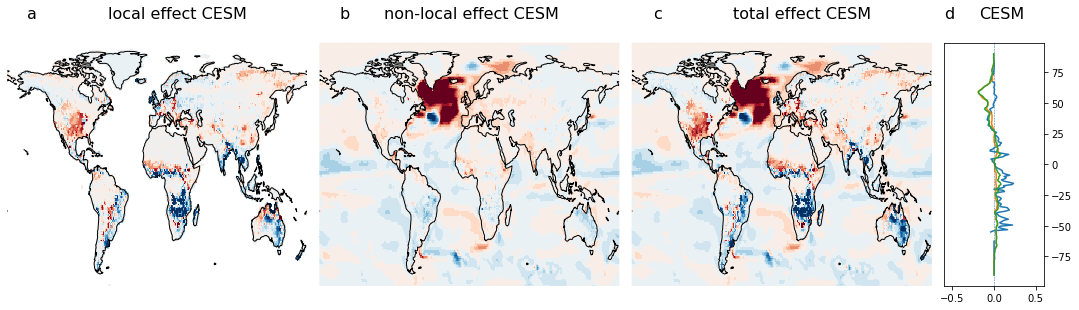

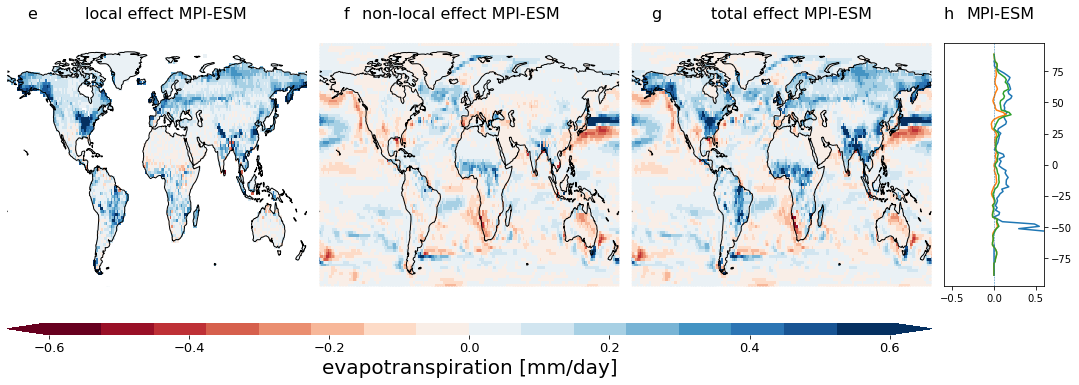

In [4]:


import numpy as np
import os 
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
#from netCDF4 import Dataset as NetCDFFile 
import cartopy.crs as ccrs
import matplotlib.colors as colors
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import mplotutils as mpu

#add panel labels and model names         ax[j-1].text(0.1, 1.15, P_list[j-1], transform=ax.transAxes,fontsize=16, fontweight='bold', va='top', ha='right')

outdir=r'C:/Users/sdeherto/OneDrive - Vrije Universiteit Brussel/phd/LAMACLIMA/wam_data/new/signal_seperated/'
#title='2m air temperature'
plt.rcParams['figure.figsize'] = [18, 7.5]
#matplotlib.rc('xtick', labelsize=20) 
#matplotlib.rc('ytick', labelsize=20) 
mpl.rc('axes',edgecolor='none')
l_vapo = 2450000 #Latent heat of vaporization (J/kg)
outdir=r'C:/Users/sdeherto/OneDrive - Vrije Universiteit Brussel/phd/LAMACLIMA/wam_data/new/signal_seperated/'

case='frst-ctl'
season=False 
sensitivity=False
level='none'
relative=False 
vlims=[-0.6,0.6]
lat_lims=[-0.6,0.6]
model_list=['cesm', 'mpiesm']
var_list=['LHFLX','hfls']

cmor_list=['Amon','Amon']
#unit='W/m$^{2}$'
unit='mm/day'
label='evapotranspiration'
#nit='/ '
#unit='m$^{-2}$/m$^{-2}$'

lsm_data_CESM = r'C:/Users/sdeherto/OneDrive - Vrije Universiteit Brussel/phd/LAMACLIMA/wam_data/cesm/landmask_cesm.nc'
ds_mask = xr.open_dataset(lsm_data_CESM)
da_mask=ds_mask['landmask']  
  
lsm_data_MPIESM = r'C:/Users/sdeherto/OneDrive - Vrije Universiteit Brussel/phd/LAMACLIMA/wam_data/mpiesm/landmask_mpiesm.nc'# insert landseamask here
ds_mask = xr.open_dataset(lsm_data_MPIESM)
da_mask_mpi=ds_mask['landmask']  
da_mask_mpi=np.flipud(da_mask_mpi)


masks=[da_mask,da_mask_mpi]
k=0
for model in model_list:
    k=k+1
    if model=='cesm':
        var=var_list[0]
        cmor_table=cmor_list[0]
        mask_local=masks[0]
    elif model=='mpiesm':
        var=var_list[1]
        cmor_table=cmor_list[1]
        mask_local=masks[1]


    varname=var
    var_local=var+'_local'
    var_nonlocal=var+'_nonlocal'
    var_total=var+'_total'

    tseriesdir= outdir + '/'+model+'/'
    fn=varname + '_' + case +'_' + model + '_timmean_signal-separated.nc'
    ds = xr.open_dataset(tseriesdir+fn)
    da_local=ds[var_local].mean('time')
    da_nonlocal=ds[var_nonlocal].mean('time')
    da_total=ds[var_total].mean('time')
    
    if model=='mpiesm':
        mask_local=xr.DataArray(mask_local,coords=(da_local.lat,da_local.lon)) 
    i=0
    j=0
    ############ define the projection,
    #f, ax = plt.subplots(2,2)
    fig = plt.figure()
    gs = fig.add_gridspec(2,4,width_ratios=[3,3,3,1])
    label_list=['a','b','c','d','e','f','g','h']
    if model=='ecearth' and var =='slhf':
            da_local=da_local/(3*3600)/(l_vapo*1000)*1000*3600*24
            da_nonlocal=da_nonlocal/(3*3600)/(l_vapo*1000)*1000*3600*24
            da_total=da_total/(3*3600)/(l_vapo*1000)*1000*3600*24
    if model=='mpiesm' and var =='hfls':
            da_local=da_local/(l_vapo*1000)*1000*3600*24
            da_nonlocal=da_nonlocal/(l_vapo*1000)*1000*3600*24
            da_total=da_total/(l_vapo*1000)*1000*3600*24
    if model=='cesm' and var =='LHFLX':
            da_local=da_local/(l_vapo*1000)*1000*3600*24
            da_nonlocal=da_nonlocal/(l_vapo*1000)*1000*3600*24
            da_total=da_total/(l_vapo*1000)*1000*3600*24
            
    name = da_total.name
    for da in [da_local, da_nonlocal, da_total]:
        cmap = 'RdBu'
        i=i+1
    #     da_mean=xr.where(da_mask==1,da_mean,0)
        if vlims==False:
                plot_lims = [da.min(), da.max()]
        else:
                plot_lims = [vlims[0],vlims[1]]
    # define colorbar levels
        ax = fig.add_subplot(gs[k-1,j], projection=ccrs.PlateCarree())
        levels = np.arange(plot_lims[0], plot_lims[1]+20, 20)
        levels=[-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2]
    # define colormap (more info on colormaps: https://matplotlib.org/users/colormaps.html)

          #cmap, norm = mpu.from_levels_and_cmap(levels, 'RdBu_r', extend='both')
        cbar_label = unit

           # add the coastlines to the plot

        ax.coastlines()
        # plot data array as a map, with the previously defined argumnets
        h=da.plot(ax=ax, cmap=plt.cm.get_cmap(cmap, 16), vmin=plot_lims[0], vmax=plot_lims[1], add_colorbar=False)
        # plot the colorbar with all predefined arguments
        if plot_lims[0]>da.min() and plot_lims[1]<da.max():
            extend='both'
        elif plot_lims[0]>da.min() and plot_lims[1]> da.max():
            extend='min'
        elif plot_lims[0]<da.min() and plot_lims[1]<da.max():
            extend='max'
        else:
            extend='neither'
        if k==1:
            if i==1:
                cesm_local_extend=extend
                ax.set_ylabel(model)
            elif i==2:
                cesm_nonlocal_extend=extend
            elif i==3:
                cesm_total_extend=extend
        elif k==2:
            if i==1:
                mpiesm_local_extend=extend
            elif i==2:
                mpiesm_nonlocal_extend=extend
            elif i==3:
                mpiesm_total_extend=extend
        elif k==3:
            if i==1:
                ecearth_local_extend=extend
            elif i==2:
                ecearth_nonlocal_extend=extend
            elif i==3:
                ecearth_total_extend=extend
        #if j==4:
        #cbar   = fig.colorbar(h, ax=ax, cmap=cmap,spacing='uniform',orientation='horizontal',label = cbar_label,pad = 0.05,extend=extend)
        #extend='both'
          # add the title
        #ax.set_title(title)
          # adjust colorbar extent to axes extent

        ax.set_aspect('auto')
     # set the extent of the cartopy geoAxes to \"global\"
          #ax.set_global()

          # or alternatively, if you want to plot a certain region, use (example: Europe)
        ax.set_extent([-180, 180, -63, 89], ccrs.PlateCarree())

        levels = [0, 3.2, 5]
        if i==1:
            ax_1=ax
            if model=='cesm':
                ax.text(0.1, 1.15, 'a', transform=ax.transAxes,fontsize=16, va='top', ha='right')
                ax.text(0.8, 1.15, 'local effect CESM', transform=ax.transAxes,fontsize=16, va='top', ha='right')
            elif model=='mpiesm':
                ax.text(0.1, 1.15, 'e', transform=ax.transAxes,fontsize=16, va='top', ha='right')
                ax.text(0.8, 1.15, 'local effect MPI-ESM', transform=ax.transAxes,fontsize=16, va='top', ha='right')
            elif model=='ecearth':
                ax.text(0.1, 1.15, 'i', transform=ax.transAxes,fontsize=16, va='top', ha='right')
                ax.text(0.8, 1.15, 'local effect EC-EARTH', transform=ax.transAxes,fontsize=16, va='top', ha='right')
            
        elif i==2:
            if model=='cesm':
                ax.text(0.1, 1.15, 'b', transform=ax.transAxes,fontsize=16, va='top', ha='right')
                ax.text(0.8, 1.15, 'non-local effect CESM', transform=ax.transAxes,fontsize=16, va='top', ha='right')

            elif model=='mpiesm':
                ax.text(0.1, 1.15, 'f', transform=ax.transAxes,fontsize=16,va='top', ha='right')
                ax.text(0.8, 1.15, 'non-local effect MPI-ESM', transform=ax.transAxes,fontsize=16, va='top', ha='right')
            elif model=='ecearth':
                ax.text(0.1, 1.15, 'j', transform=ax.transAxes,fontsize=16,va='top', ha='right')
                ax.text(0.9, 1.15, 'non-local effect EC-EARTH', transform=ax.transAxes,fontsize=16, va='top', ha='right')
        elif i==3:
            if model=='cesm':
                ax.text(0.1, 1.15, 'c', transform=ax.transAxes,fontsize=16, va='top', ha='right')
                ax.text(0.8, 1.15, 'total effect CESM', transform=ax.transAxes,fontsize=16, va='top', ha='right')

            elif model=='mpiesm':
                ax.text(0.1, 1.15, 'g', transform=ax.transAxes,fontsize=16, va='top', ha='right')
                ax.text(0.8, 1.15, 'total effect MPI-ESM', transform=ax.transAxes,fontsize=16, va='top', ha='right')
            elif model=='ecearth':
                ax.text(0.1, 1.15, 'k', transform=ax.transAxes,fontsize=16, va='top', ha='right')
                ax.text(0.8, 1.15, 'total effect EC-EARTH', transform=ax.transAxes,fontsize=16, va='top', ha='right')
          # ax.set_extent([-13, 43, 35, 70], ccrs.PlateCarree())
          # save the figure, adjusting the resolution
            ax_2=ax
        
        j=j+1
    
    ax = fig.add_subplot(gs[k-1,j])    
    dalat_local=da_local.mean(dim='lon')
    dalat_nonlocal=da_nonlocal.mean(dim='lon')
    dalat_total=da_total.mean(dim='lon')
    ax.plot(dalat_local[:],dalat_local.lat,label='local signal')   #adapt colors to different flavours of same color
    ax.plot(dalat_nonlocal[:],dalat_nonlocal.lat,label='non-local signal')
    ax.plot(dalat_total[:],dalat_total.lat,label='total signal')
    plt.xlim([plot_lims[0], plot_lims[1]])
    plt.xlim([lat_lims[0],lat_lims[1]])
    #ax.set_ylabel('Latitude (°)')
    ax.yaxis.set_ticks_position('right')
    if model=='cesm':
        ax.text(0.1, 1.15, 'd', transform=ax.transAxes,fontsize=16, va='top', ha='right')
        ax.text(0.8, 1.15, 'CESM', transform=ax.transAxes,fontsize=16, va='top', ha='right')
    elif model=='mpiesm':
        ax.text(0.1, 1.15, 'h', transform=ax.transAxes,fontsize=16, va='top', ha='right')
        ax.text(0.9, 1.15, 'MPI-ESM', transform=ax.transAxes,fontsize=16, va='top', ha='right')
    elif model=='ecearth':
        ax.text(0.05, 1.15, 'l', transform=ax.transAxes,fontsize=16, va='top', ha='right')
        ax.text(0.95, 1.15, 'EC-EARTH', transform=ax.transAxes,fontsize=16, va='top', ha='right')
    #yticks().set_ticks_position('right')
    ax.axvline(x=0,linewidth=0.5,linestyle='dashed')
    ax.spines['bottom'].set_color('black')
    ax.spines['top'].set_color('black') 
    ax.spines['right'].set_color('black')
    ax.spines['left'].set_color('black')   
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)

    if k==3:
        ax.legend(bbox_to_anchor=(1.4, -0.15),edgecolor='none',prop={'size': 12})
    fig.subplots_adjust(left=0.1, right=0.9,bottom=0.05, top=0.95,hspace=0., wspace=0.05)
    #fig.tight_layout()
#plt.show()

extend_list=[cesm_local_extend,cesm_nonlocal_extend,cesm_total_extend,mpiesm_local_extend,mpiesm_nonlocal_extend,mpiesm_total_extend,ecearth_local_extend,ecearth_nonlocal_extend,ecearth_total_extend]
if extend_list.count('both')>0:
    extend='both'
elif extend_list.count('min')>0 and extend_list.count('max')>0:
    extend='both'
elif extend_list.count('min')>0:
    extend='min'
elif extend_list.count('max')>0:
    extend='max'
else:
    extend='neither'
cbar = mpu.colorbar(h, ax1=ax_1,ax2=ax_2, shift=0., size=0.05, orientation='horizontal',extend=extend,label=cbar_label)
cbar.set_label(label+' ['+unit+']', size=20)
cbar.ax.tick_params(labelsize=13) 
#fig.tight_layout()



     

C:\Users\sdeherto\.conda\envs\pyvis\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Users\sdeherto\.conda\envs\pyvis\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


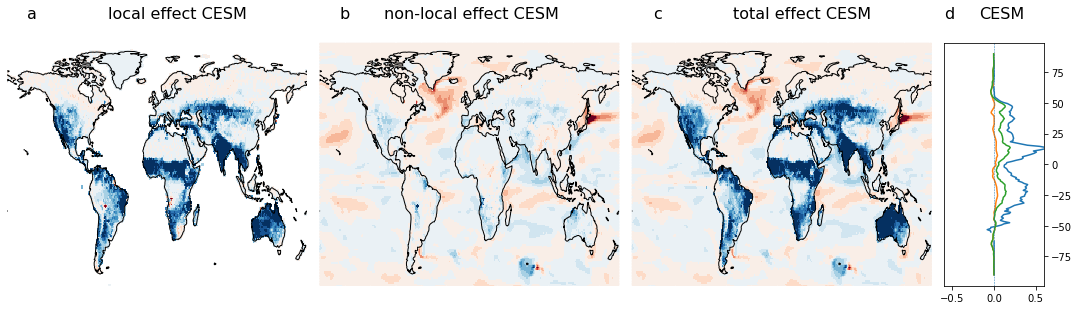

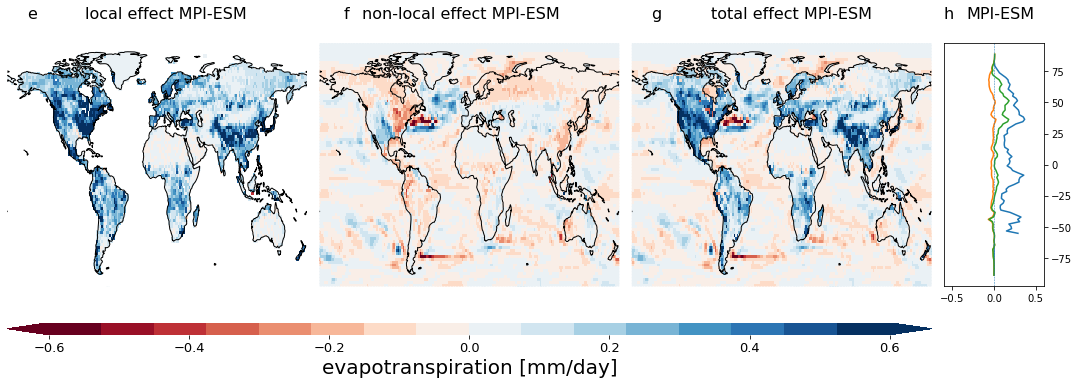

In [5]:


import numpy as np
import os 
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
#from netCDF4 import Dataset as NetCDFFile 
import cartopy.crs as ccrs
import matplotlib.colors as colors
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import mplotutils as mpu

#add panel labels and model names         ax[j-1].text(0.1, 1.15, P_list[j-1], transform=ax.transAxes,fontsize=16, fontweight='bold', va='top', ha='right')

outdir=r'C:/Users/sdeherto/OneDrive - Vrije Universiteit Brussel/phd/LAMACLIMA/wam_data/new/signal_seperated/'
#title='2m air temperature'
plt.rcParams['figure.figsize'] = [18, 7.5]
#matplotlib.rc('xtick', labelsize=20) 
#matplotlib.rc('ytick', labelsize=20) 
mpl.rc('axes',edgecolor='none')
l_vapo = 2450000 #Latent heat of vaporization (J/kg)
outdir=r'C:/Users/sdeherto/OneDrive - Vrije Universiteit Brussel/phd/LAMACLIMA/wam_data/new/signal_seperated/'

case='irr-crop'
season=False 
sensitivity=False
level='none'
relative=False 
vlims=[-0.6,0.6]
lat_lims=[-0.6,0.6]
model_list=['cesm', 'mpiesm']
var_list=['LHFLX','hfls']

cmor_list=['Amon','Amon']
#unit='W/m$^{2}$'
unit='mm/day'
label='evapotranspiration'
#nit='/ '
#unit='m$^{-2}$/m$^{-2}$'

lsm_data_CESM = r'C:/Users/sdeherto/OneDrive - Vrije Universiteit Brussel/phd/LAMACLIMA/wam_data/cesm/landmask_cesm.nc'
ds_mask = xr.open_dataset(lsm_data_CESM)
da_mask=ds_mask['landmask']  
  
lsm_data_MPIESM = r'C:/Users/sdeherto/OneDrive - Vrije Universiteit Brussel/phd/LAMACLIMA/wam_data/mpiesm/landmask_mpiesm.nc'# insert landseamask here
ds_mask = xr.open_dataset(lsm_data_MPIESM)
da_mask_mpi=ds_mask['landmask']  
da_mask_mpi=np.flipud(da_mask_mpi)


masks=[da_mask,da_mask_mpi]
k=0
for model in model_list:
    k=k+1
    if model=='cesm':
        var=var_list[0]
        cmor_table=cmor_list[0]
        mask_local=masks[0]
    elif model=='mpiesm':
        var=var_list[1]
        cmor_table=cmor_list[1]
        mask_local=masks[1]


    varname=var
    var_local=var+'_local'
    var_nonlocal=var+'_nonlocal'
    var_total=var+'_total'

    tseriesdir= outdir + '/'+model+'/'
    fn=varname + '_' + case +'_' + model + '_timmean_signal-separated.nc'
    ds = xr.open_dataset(tseriesdir+fn)
    da_local=ds[var_local].mean('time')
    da_nonlocal=ds[var_nonlocal].mean('time')
    da_total=ds[var_total].mean('time')
    
    if model=='mpiesm':
        mask_local=xr.DataArray(mask_local,coords=(da_local.lat,da_local.lon)) 
    i=0
    j=0
    ############ define the projection,
    #f, ax = plt.subplots(2,2)
    fig = plt.figure()
    gs = fig.add_gridspec(2,4,width_ratios=[3,3,3,1])
    label_list=['a','b','c','d','e','f','g','h']
    if model=='ecearth' and var =='slhf':
            da_local=da_local/(3*3600)/(l_vapo*1000)*1000*3600*24
            da_nonlocal=da_nonlocal/(3*3600)/(l_vapo*1000)*1000*3600*24
            da_total=da_total/(3*3600)/(l_vapo*1000)*1000*3600*24
    if model=='mpiesm' and var =='hfls':
            da_local=da_local/(l_vapo*1000)*1000*3600*24
            da_nonlocal=da_nonlocal/(l_vapo*1000)*1000*3600*24
            da_total=da_total/(l_vapo*1000)*1000*3600*24
    if model=='cesm' and var =='LHFLX':
            da_local=da_local/(l_vapo*1000)*1000*3600*24
            da_nonlocal=da_nonlocal/(l_vapo*1000)*1000*3600*24
            da_total=da_total/(l_vapo*1000)*1000*3600*24
            
    name = da_total.name
    for da in [da_local, da_nonlocal, da_total]:
        cmap = 'RdBu'
        i=i+1
    #     da_mean=xr.where(da_mask==1,da_mean,0)
        if vlims==False:
                plot_lims = [da.min(), da.max()]
        else:
                plot_lims = [vlims[0],vlims[1]]
    # define colorbar levels
        ax = fig.add_subplot(gs[k-1,j], projection=ccrs.PlateCarree())
        levels = np.arange(plot_lims[0], plot_lims[1]+20, 20)
        levels=[-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2]
    # define colormap (more info on colormaps: https://matplotlib.org/users/colormaps.html)

          #cmap, norm = mpu.from_levels_and_cmap(levels, 'RdBu_r', extend='both')
        cbar_label = unit

           # add the coastlines to the plot

        ax.coastlines()
        # plot data array as a map, with the previously defined argumnets
        h=da.plot(ax=ax, cmap=plt.cm.get_cmap(cmap, 16), vmin=plot_lims[0], vmax=plot_lims[1], add_colorbar=False)
        # plot the colorbar with all predefined arguments
        if plot_lims[0]>da.min() and plot_lims[1]<da.max():
            extend='both'
        elif plot_lims[0]>da.min() and plot_lims[1]> da.max():
            extend='min'
        elif plot_lims[0]<da.min() and plot_lims[1]<da.max():
            extend='max'
        else:
            extend='neither'
        if k==1:
            if i==1:
                cesm_local_extend=extend
                ax.set_ylabel(model)
            elif i==2:
                cesm_nonlocal_extend=extend
            elif i==3:
                cesm_total_extend=extend
        elif k==2:
            if i==1:
                mpiesm_local_extend=extend
            elif i==2:
                mpiesm_nonlocal_extend=extend
            elif i==3:
                mpiesm_total_extend=extend
        elif k==3:
            if i==1:
                ecearth_local_extend=extend
            elif i==2:
                ecearth_nonlocal_extend=extend
            elif i==3:
                ecearth_total_extend=extend
        #if j==4:
        #cbar   = fig.colorbar(h, ax=ax, cmap=cmap,spacing='uniform',orientation='horizontal',label = cbar_label,pad = 0.05,extend=extend)
        #extend='both'
          # add the title
        #ax.set_title(title)
          # adjust colorbar extent to axes extent

        ax.set_aspect('auto')
     # set the extent of the cartopy geoAxes to \"global\"
          #ax.set_global()

          # or alternatively, if you want to plot a certain region, use (example: Europe)
        ax.set_extent([-180, 180, -63, 89], ccrs.PlateCarree())

        levels = [0, 3.2, 5]
        if i==1:
            ax_1=ax
            if model=='cesm':
                ax.text(0.1, 1.15, 'a', transform=ax.transAxes,fontsize=16, va='top', ha='right')
                ax.text(0.8, 1.15, 'local effect CESM', transform=ax.transAxes,fontsize=16, va='top', ha='right')
            elif model=='mpiesm':
                ax.text(0.1, 1.15, 'e', transform=ax.transAxes,fontsize=16, va='top', ha='right')
                ax.text(0.8, 1.15, 'local effect MPI-ESM', transform=ax.transAxes,fontsize=16, va='top', ha='right')
            elif model=='ecearth':
                ax.text(0.1, 1.15, 'i', transform=ax.transAxes,fontsize=16, va='top', ha='right')
                ax.text(0.8, 1.15, 'local effect EC-EARTH', transform=ax.transAxes,fontsize=16, va='top', ha='right')
            
        elif i==2:
            if model=='cesm':
                ax.text(0.1, 1.15, 'b', transform=ax.transAxes,fontsize=16, va='top', ha='right')
                ax.text(0.8, 1.15, 'non-local effect CESM', transform=ax.transAxes,fontsize=16, va='top', ha='right')

            elif model=='mpiesm':
                ax.text(0.1, 1.15, 'f', transform=ax.transAxes,fontsize=16,va='top', ha='right')
                ax.text(0.8, 1.15, 'non-local effect MPI-ESM', transform=ax.transAxes,fontsize=16, va='top', ha='right')
            elif model=='ecearth':
                ax.text(0.1, 1.15, 'j', transform=ax.transAxes,fontsize=16,va='top', ha='right')
                ax.text(0.9, 1.15, 'non-local effect EC-EARTH', transform=ax.transAxes,fontsize=16, va='top', ha='right')
        elif i==3:
            if model=='cesm':
                ax.text(0.1, 1.15, 'c', transform=ax.transAxes,fontsize=16, va='top', ha='right')
                ax.text(0.8, 1.15, 'total effect CESM', transform=ax.transAxes,fontsize=16, va='top', ha='right')

            elif model=='mpiesm':
                ax.text(0.1, 1.15, 'g', transform=ax.transAxes,fontsize=16, va='top', ha='right')
                ax.text(0.8, 1.15, 'total effect MPI-ESM', transform=ax.transAxes,fontsize=16, va='top', ha='right')
            elif model=='ecearth':
                ax.text(0.1, 1.15, 'k', transform=ax.transAxes,fontsize=16, va='top', ha='right')
                ax.text(0.8, 1.15, 'total effect EC-EARTH', transform=ax.transAxes,fontsize=16, va='top', ha='right')
          # ax.set_extent([-13, 43, 35, 70], ccrs.PlateCarree())
          # save the figure, adjusting the resolution
            ax_2=ax
        
        j=j+1
    
    ax = fig.add_subplot(gs[k-1,j])    
    dalat_local=da_local.mean(dim='lon')
    dalat_nonlocal=da_nonlocal.mean(dim='lon')
    dalat_total=da_total.mean(dim='lon')
    ax.plot(dalat_local[:],dalat_local.lat,label='local signal')   #adapt colors to different flavours of same color
    ax.plot(dalat_nonlocal[:],dalat_nonlocal.lat,label='non-local signal')
    ax.plot(dalat_total[:],dalat_total.lat,label='total signal')
    plt.xlim([plot_lims[0], plot_lims[1]])
    plt.xlim([lat_lims[0],lat_lims[1]])
    #ax.set_ylabel('Latitude (°)')
    ax.yaxis.set_ticks_position('right')
    if model=='cesm':
        ax.text(0.1, 1.15, 'd', transform=ax.transAxes,fontsize=16, va='top', ha='right')
        ax.text(0.8, 1.15, 'CESM', transform=ax.transAxes,fontsize=16, va='top', ha='right')
    elif model=='mpiesm':
        ax.text(0.1, 1.15, 'h', transform=ax.transAxes,fontsize=16, va='top', ha='right')
        ax.text(0.9, 1.15, 'MPI-ESM', transform=ax.transAxes,fontsize=16, va='top', ha='right')
    elif model=='ecearth':
        ax.text(0.05, 1.15, 'l', transform=ax.transAxes,fontsize=16, va='top', ha='right')
        ax.text(0.95, 1.15, 'EC-EARTH', transform=ax.transAxes,fontsize=16, va='top', ha='right')
    #yticks().set_ticks_position('right')
    ax.axvline(x=0,linewidth=0.5,linestyle='dashed')
    ax.spines['bottom'].set_color('black')
    ax.spines['top'].set_color('black') 
    ax.spines['right'].set_color('black')
    ax.spines['left'].set_color('black')   
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)

    if k==3:
        ax.legend(bbox_to_anchor=(1.4, -0.15),edgecolor='none',prop={'size': 12})
    fig.subplots_adjust(left=0.1, right=0.9,bottom=0.05, top=0.95,hspace=0., wspace=0.05)
    #fig.tight_layout()
#plt.show()

extend_list=[cesm_local_extend,cesm_nonlocal_extend,cesm_total_extend,mpiesm_local_extend,mpiesm_nonlocal_extend,mpiesm_total_extend,ecearth_local_extend,ecearth_nonlocal_extend,ecearth_total_extend]
if extend_list.count('both')>0:
    extend='both'
elif extend_list.count('min')>0 and extend_list.count('max')>0:
    extend='both'
elif extend_list.count('min')>0:
    extend='min'
elif extend_list.count('max')>0:
    extend='max'
else:
    extend='neither'
cbar = mpu.colorbar(h, ax1=ax_1,ax2=ax_2, shift=0., size=0.05, orientation='horizontal',extend=extend,label=cbar_label)
cbar.set_label(label+' ['+unit+']', size=20)
cbar.ax.tick_params(labelsize=13) 
#fig.tight_layout()



     

C:\Users\sdeherto\.conda\envs\pyvis\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Users\sdeherto\.conda\envs\pyvis\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Users\sdeherto\.conda\envs\pyvis\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Users\sdeherto\.conda\envs\pyvis\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


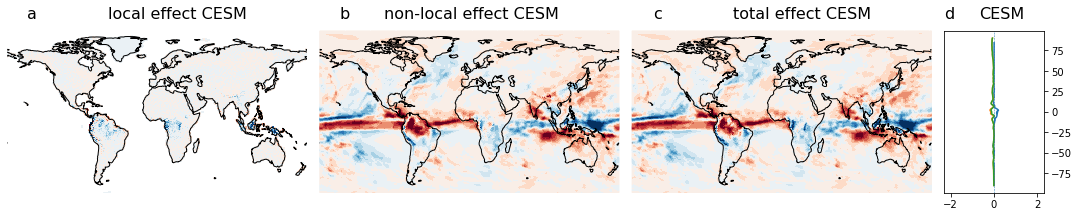

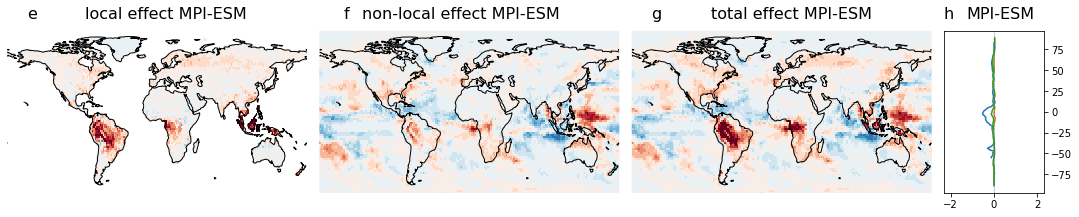

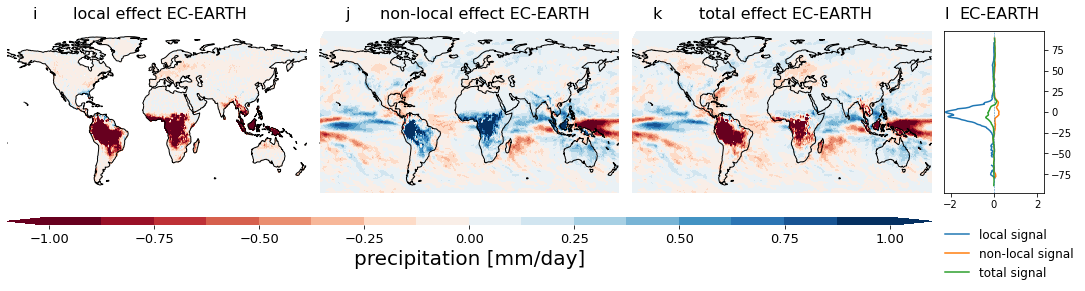

In [8]:


import numpy as np
import os 
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
#from netCDF4 import Dataset as NetCDFFile 
import cartopy.crs as ccrs
import matplotlib.colors as colors
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import mplotutils as mpu

#add panel labels and model names         ax[j-1].text(0.1, 1.15, P_list[j-1], transform=ax.transAxes,fontsize=16, fontweight='bold', va='top', ha='right')

outdir=r'C:/Users/sdeherto/OneDrive - Vrije Universiteit Brussel/phd/LAMACLIMA/wam_data/new/signal_seperated/'
#title='2m air temperature'
plt.rcParams['figure.figsize'] = [18, 7.5]
#matplotlib.rc('xtick', labelsize=20) 
#matplotlib.rc('ytick', labelsize=20) 
mpl.rc('axes',edgecolor='none')
l_vapo = 2450000 #Latent heat of vaporization (J/kg)
outdir=r'C:/Users/sdeherto/OneDrive - Vrije Universiteit Brussel/phd/LAMACLIMA/wam_data/new/signal_seperated/'

case='crop-ctl'
season=False 
sensitivity=False
level='none'
relative=False 
vlims=[-1,1]
lat_lims=[-2.3,2.3]
model_list=['cesm', 'mpiesm','ecearth']
var_list=['PRECT','pr','tp']

cmor_list=['Amon','Amon','Amon']
#unit='W/m$^{2}$'
unit='mm/day'
label='precipitation'
#nit='/ '
#unit='m$^{-2}$/m$^{-2}$'

lsm_data_CESM = r'C:/Users/sdeherto/OneDrive - Vrije Universiteit Brussel/phd/LAMACLIMA/wam_data/cesm/landmask_cesm.nc'
ds_mask = xr.open_dataset(lsm_data_CESM)
da_mask=ds_mask['landmask']  
  
lsm_data_MPIESM = r'C:/Users/sdeherto/OneDrive - Vrije Universiteit Brussel/phd/LAMACLIMA/wam_data/mpiesm/landmask_mpiesm.nc'# insert landseamask here
ds_mask = xr.open_dataset(lsm_data_MPIESM)
da_mask_mpi=ds_mask['landmask']  
da_mask_mpi=np.flipud(da_mask_mpi)

lsm_data_EC = r'C:/Users/sdeherto/OneDrive - Vrije Universiteit Brussel/phd/LAMACLIMA/wam_data/ecearth/interpolated_ec-earth_land_sea_mask.nc'# insert landseamask here
ds_mask = xr.open_dataset(lsm_data_EC)
da_mask_ec=ds_mask['mask']  

masks=[da_mask,da_mask_mpi,da_mask_ec]
k=0
for model in model_list:
    k=k+1
    if model=='cesm':
        var=var_list[0]
        cmor_table=cmor_list[0]
        mask_local=masks[0]
    elif model=='mpiesm':
        var=var_list[1]
        cmor_table=cmor_list[1]
        mask_local=masks[1]
    elif model=='ecearth':
        var=var_list[2]
        cmor_table=cmor_list[2]
        mask_local=masks[2]


    varname=var
    var_local=var+'_local'
    var_nonlocal=var+'_nonlocal'
    var_total=var+'_total'

    tseriesdir= outdir + '/'+model+'/'
    fn=varname + '_' + case +'_' + model + '_timmean_signal-separated.nc'
    if model=='ecearth':
        fn= 'interped_'+varname + '_' + case +'_' + model + '_ymonmean000004_signal-separated.nc'
    ds = xr.open_dataset(tseriesdir+fn)
    da_local=ds[var_local].mean('time')
    da_nonlocal=ds[var_nonlocal].mean('time')
    da_total=ds[var_total].mean('time')
    
    if model=='mpiesm':
        mask_local=xr.DataArray(mask_local,coords=(da_local.lat,da_local.lon)) 
    i=0
    j=0
    ############ define the projection,
    #f, ax = plt.subplots(2,2)
    fig = plt.figure()
    gs = fig.add_gridspec(3,4,width_ratios=[3,3,3,1])
    label_list=['a','b','c','d','e','f','g','h','i','j','k','l']
    if model=='ecearth':
            da_local=xr.where(mask_local==1,da_local,np.nan)
    if model=='ecearth' and var =='slhf':
            da_local=da_local/(3*3600)/(l_vapo*1000)*1000*3600*24
            da_nonlocal=da_nonlocal/(3*3600)/(l_vapo*1000)*1000*3600*24
            da_total=da_total/(3*3600)/(l_vapo*1000)*1000*3600*24
    if model=='mpiesm' and var =='hfls':
            da_local=da_local/(l_vapo*1000)*1000*3600*24
            da_nonlocal=da_nonlocal/(l_vapo*1000)*1000*3600*24
            da_total=da_total/(l_vapo*1000)*1000*3600*24
    if model=='cesm' and var =='LHFLX':
            da_local=da_local/(l_vapo*1000)*1000*3600*24
            da_nonlocal=da_nonlocal/(l_vapo*1000)*1000*3600*24
            da_total=da_total/(l_vapo*1000)*1000*3600*24
    if model=='ecearth' and var =='tp':
            da_local=da_local*8*1000
            da_nonlocal=da_nonlocal*8*1000
            da_total=da_total*8*1000
    if model=='mpiesm' and var =='pr':
            da_local=da_local*3600*24
            da_nonlocal=da_nonlocal*3600*24
            da_total=da_total*3600*24
    if model=='cesm' and var =='PRECT':
            da_local=da_local*1000*3600*24
            da_nonlocal=da_nonlocal*1000*3600*24
            da_total=da_total*1000*3600*24
            
    name = da_total.name
    for da in [da_local, da_nonlocal, da_total]:
        cmap = 'RdBu'
        i=i+1
    #     da_mean=xr.where(da_mask==1,da_mean,0)
        if vlims==False:
                plot_lims = [da.min(), da.max()]
        else:
                plot_lims = [vlims[0],vlims[1]]
    # define colorbar levels
        ax = fig.add_subplot(gs[k-1,j], projection=ccrs.PlateCarree())
        levels = np.arange(plot_lims[0], plot_lims[1]+20, 20)
        levels=[-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2]
    # define colormap (more info on colormaps: https://matplotlib.org/users/colormaps.html)

          #cmap, norm = mpu.from_levels_and_cmap(levels, 'RdBu_r', extend='both')
        cbar_label = unit

           # add the coastlines to the plot

        ax.coastlines()
        # plot data array as a map, with the previously defined argumnets
        h=da.plot(ax=ax, cmap=plt.cm.get_cmap(cmap, 16), vmin=plot_lims[0], vmax=plot_lims[1], add_colorbar=False)
        # plot the colorbar with all predefined arguments
        if plot_lims[0]>da.min() and plot_lims[1]<da.max():
            extend='both'
        elif plot_lims[0]>da.min() and plot_lims[1]> da.max():
            extend='min'
        elif plot_lims[0]<da.min() and plot_lims[1]<da.max():
            extend='max'
        else:
            extend='neither'
        if k==1:
            if i==1:
                cesm_local_extend=extend
                ax.set_ylabel(model)
            elif i==2:
                cesm_nonlocal_extend=extend
            elif i==3:
                cesm_total_extend=extend
        elif k==2:
            if i==1:
                mpiesm_local_extend=extend
            elif i==2:
                mpiesm_nonlocal_extend=extend
            elif i==3:
                mpiesm_total_extend=extend
        elif k==3:
            if i==1:
                ecearth_local_extend=extend
            elif i==2:
                ecearth_nonlocal_extend=extend
            elif i==3:
                ecearth_total_extend=extend
        #if j==4:
        #cbar   = fig.colorbar(h, ax=ax, cmap=cmap,spacing='uniform',orientation='horizontal',label = cbar_label,pad = 0.05,extend=extend)
        #extend='both'
          # add the title
        #ax.set_title(title)
          # adjust colorbar extent to axes extent

        ax.set_aspect('auto')
     # set the extent of the cartopy geoAxes to \"global\"
          #ax.set_global()

          # or alternatively, if you want to plot a certain region, use (example: Europe)
        ax.set_extent([-180, 180, -63, 89], ccrs.PlateCarree())

        levels = [0, 3.2, 5]
        if i==1:
            ax_1=ax
            if model=='cesm':
                ax.text(0.1, 1.15, 'a', transform=ax.transAxes,fontsize=16, va='top', ha='right')
                ax.text(0.8, 1.15, 'local effect CESM', transform=ax.transAxes,fontsize=16, va='top', ha='right')
            elif model=='mpiesm':
                ax.text(0.1, 1.15, 'e', transform=ax.transAxes,fontsize=16, va='top', ha='right')
                ax.text(0.8, 1.15, 'local effect MPI-ESM', transform=ax.transAxes,fontsize=16, va='top', ha='right')
            elif model=='ecearth':
                ax.text(0.1, 1.15, 'i', transform=ax.transAxes,fontsize=16, va='top', ha='right')
                ax.text(0.8, 1.15, 'local effect EC-EARTH', transform=ax.transAxes,fontsize=16, va='top', ha='right')
            
        elif i==2:
            if model=='cesm':
                ax.text(0.1, 1.15, 'b', transform=ax.transAxes,fontsize=16, va='top', ha='right')
                ax.text(0.8, 1.15, 'non-local effect CESM', transform=ax.transAxes,fontsize=16, va='top', ha='right')

            elif model=='mpiesm':
                ax.text(0.1, 1.15, 'f', transform=ax.transAxes,fontsize=16,va='top', ha='right')
                ax.text(0.8, 1.15, 'non-local effect MPI-ESM', transform=ax.transAxes,fontsize=16, va='top', ha='right')
            elif model=='ecearth':
                ax.text(0.1, 1.15, 'j', transform=ax.transAxes,fontsize=16,va='top', ha='right')
                ax.text(0.9, 1.15, 'non-local effect EC-EARTH', transform=ax.transAxes,fontsize=16, va='top', ha='right')
        elif i==3:
            if model=='cesm':
                ax.text(0.1, 1.15, 'c', transform=ax.transAxes,fontsize=16, va='top', ha='right')
                ax.text(0.8, 1.15, 'total effect CESM', transform=ax.transAxes,fontsize=16, va='top', ha='right')

            elif model=='mpiesm':
                ax.text(0.1, 1.15, 'g', transform=ax.transAxes,fontsize=16, va='top', ha='right')
                ax.text(0.8, 1.15, 'total effect MPI-ESM', transform=ax.transAxes,fontsize=16, va='top', ha='right')
            elif model=='ecearth':
                ax.text(0.1, 1.15, 'k', transform=ax.transAxes,fontsize=16, va='top', ha='right')
                ax.text(0.8, 1.15, 'total effect EC-EARTH', transform=ax.transAxes,fontsize=16, va='top', ha='right')
          # ax.set_extent([-13, 43, 35, 70], ccrs.PlateCarree())
          # save the figure, adjusting the resolution
            ax_2=ax
        
        j=j+1
    
    ax = fig.add_subplot(gs[k-1,j])    
    dalat_local=da_local.mean(dim='lon')
    dalat_nonlocal=da_nonlocal.mean(dim='lon')
    dalat_total=da_total.mean(dim='lon')
    ax.plot(dalat_local[:],dalat_local.lat,label='local signal')   #adapt colors to different flavours of same color
    ax.plot(dalat_nonlocal[:],dalat_nonlocal.lat,label='non-local signal')
    ax.plot(dalat_total[:],dalat_total.lat,label='total signal')
    plt.xlim([plot_lims[0], plot_lims[1]])
    plt.xlim([lat_lims[0],lat_lims[1]])
    #ax.set_ylabel('Latitude (°)')
    ax.yaxis.set_ticks_position('right')
    if model=='cesm':
        ax.text(0.1, 1.15, 'd', transform=ax.transAxes,fontsize=16, va='top', ha='right')
        ax.text(0.8, 1.15, 'CESM', transform=ax.transAxes,fontsize=16, va='top', ha='right')
    elif model=='mpiesm':
        ax.text(0.1, 1.15, 'h', transform=ax.transAxes,fontsize=16, va='top', ha='right')
        ax.text(0.9, 1.15, 'MPI-ESM', transform=ax.transAxes,fontsize=16, va='top', ha='right')
    elif model=='ecearth':
        ax.text(0.05, 1.15, 'l', transform=ax.transAxes,fontsize=16, va='top', ha='right')
        ax.text(0.95, 1.15, 'EC-EARTH', transform=ax.transAxes,fontsize=16, va='top', ha='right')
    #yticks().set_ticks_position('right')
    ax.axvline(x=0,linewidth=0.5,linestyle='dashed')
    ax.spines['bottom'].set_color('black')
    ax.spines['top'].set_color('black') 
    ax.spines['right'].set_color('black')
    ax.spines['left'].set_color('black')   
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)

    if k==3:
        ax.legend(bbox_to_anchor=(1.4, -0.15),edgecolor='none',prop={'size': 12})
    fig.subplots_adjust(left=0.1, right=0.9,bottom=0.05, top=0.95,hspace=0., wspace=0.05)
    #fig.tight_layout()
#plt.show()

extend_list=[cesm_local_extend,cesm_nonlocal_extend,cesm_total_extend,mpiesm_local_extend,mpiesm_nonlocal_extend,mpiesm_total_extend,ecearth_local_extend,ecearth_nonlocal_extend,ecearth_total_extend]
if extend_list.count('both')>0:
    extend='both'
elif extend_list.count('min')>0 and extend_list.count('max')>0:
    extend='both'
elif extend_list.count('min')>0:
    extend='min'
elif extend_list.count('max')>0:
    extend='max'
else:
    extend='neither'
cbar = mpu.colorbar(h, ax1=ax_1,ax2=ax_2, shift=0., size=0.05, orientation='horizontal',extend=extend,label=cbar_label)
cbar.set_label(label+' ['+unit+']', size=20)
cbar.ax.tick_params(labelsize=13) 
#fig.tight_layout()



     

C:\Users\sdeherto\.conda\envs\pyvis\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Users\sdeherto\.conda\envs\pyvis\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


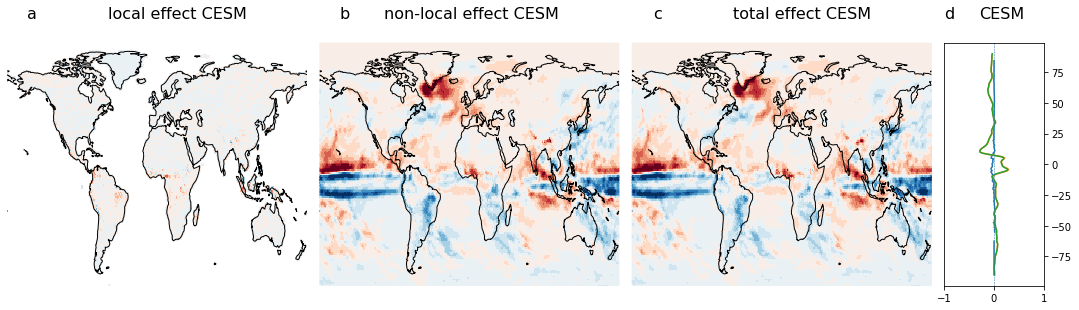

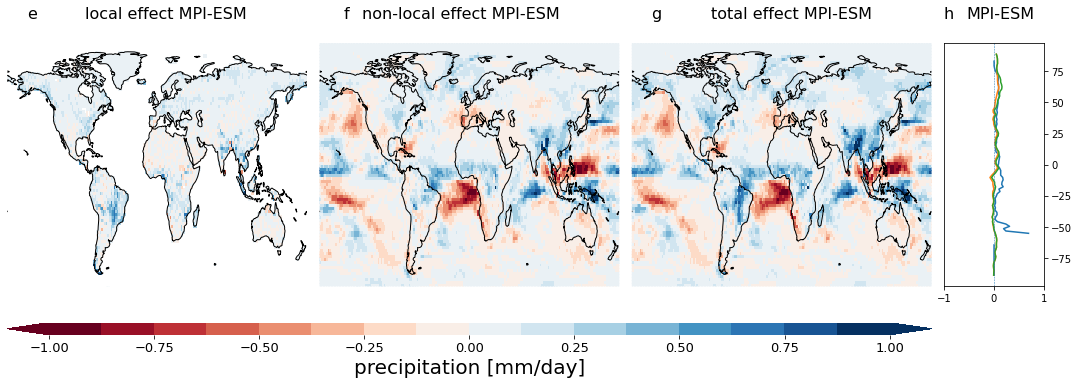

In [2]:


import numpy as np
import os 
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
#from netCDF4 import Dataset as NetCDFFile 
import cartopy.crs as ccrs
import matplotlib.colors as colors
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import mplotutils as mpu

#add panel labels and model names         ax[j-1].text(0.1, 1.15, P_list[j-1], transform=ax.transAxes,fontsize=16, fontweight='bold', va='top', ha='right')

outdir=r'C:/Users/sdeherto/OneDrive - Vrije Universiteit Brussel/phd/LAMACLIMA/wam_data/new/signal_seperated/'
#title='2m air temperature'
plt.rcParams['figure.figsize'] = [18, 7.5]
#matplotlib.rc('xtick', labelsize=20) 
#matplotlib.rc('ytick', labelsize=20) 
mpl.rc('axes',edgecolor='none')
l_vapo = 2450000 #Latent heat of vaporization (J/kg)
outdir=r'C:/Users/sdeherto/OneDrive - Vrije Universiteit Brussel/phd/LAMACLIMA/wam_data/new/signal_seperated/'

case='frst-ctl'
season=False 
sensitivity=False
level='none'
relative=False 
vlims=[-1,1]
lat_lims=[-1,1]
model_list=['cesm', 'mpiesm']
var_list=['PRECT','pr']

cmor_list=['Amon','Amon']
#unit='W/m$^{2}$'
unit='mm/day'
label='precipitation'
#nit='/ '
#unit='m$^{-2}$/m$^{-2}$'

lsm_data_CESM = r'C:/Users/sdeherto/OneDrive - Vrije Universiteit Brussel/phd/LAMACLIMA/wam_data/cesm/landmask_cesm.nc'
ds_mask = xr.open_dataset(lsm_data_CESM)
da_mask=ds_mask['landmask']  
  
lsm_data_MPIESM = r'C:/Users/sdeherto/OneDrive - Vrije Universiteit Brussel/phd/LAMACLIMA/wam_data/mpiesm/landmask_mpiesm.nc'# insert landseamask here
ds_mask = xr.open_dataset(lsm_data_MPIESM)
da_mask_mpi=ds_mask['landmask']  
da_mask_mpi=np.flipud(da_mask_mpi)


masks=[da_mask,da_mask_mpi]
k=0
for model in model_list:
    k=k+1
    if model=='cesm':
        var=var_list[0]
        cmor_table=cmor_list[0]
        mask_local=masks[0]
    elif model=='mpiesm':
        var=var_list[1]
        cmor_table=cmor_list[1]
        mask_local=masks[1]


    varname=var
    var_local=var+'_local'
    var_nonlocal=var+'_nonlocal'
    var_total=var+'_total'

    tseriesdir= outdir + '/'+model+'/'
    fn=varname + '_' + case +'_' + model + '_timmean_signal-separated.nc'
    ds = xr.open_dataset(tseriesdir+fn)
    da_local=ds[var_local].mean('time')
    da_nonlocal=ds[var_nonlocal].mean('time')
    da_total=ds[var_total].mean('time')
    
    if model=='mpiesm':
        mask_local=xr.DataArray(mask_local,coords=(da_local.lat,da_local.lon)) 
    i=0
    j=0
    ############ define the projection,
    #f, ax = plt.subplots(2,2)
    fig = plt.figure()
    gs = fig.add_gridspec(2,4,width_ratios=[3,3,3,1])
    label_list=['a','b','c','d','e','f','g','h']
    if model=='ecearth' and var =='slhf':
            da_local=da_local/(3*3600)/(l_vapo*1000)*1000*3600*24
            da_nonlocal=da_nonlocal/(3*3600)/(l_vapo*1000)*1000*3600*24
            da_total=da_total/(3*3600)/(l_vapo*1000)*1000*3600*24
    if model=='mpiesm' and var =='hfls':
            da_local=da_local/(l_vapo*1000)*1000*3600*24
            da_nonlocal=da_nonlocal/(l_vapo*1000)*1000*3600*24
            da_total=da_total/(l_vapo*1000)*1000*3600*24
    if model=='cesm' and var =='LHFLX':
            da_local=da_local/(l_vapo*1000)*1000*3600*24
            da_nonlocal=da_nonlocal/(l_vapo*1000)*1000*3600*24
            da_total=da_total/(l_vapo*1000)*1000*3600*24
    if model=='ecearth' and var =='tp':
            da_local=da_local*3600*24
            da_nonlocal=da_nonlocal*3600*24
            da_total=da_total*3600*24
    if model=='mpiesm' and var =='pr':
            da_local=da_local*3600*24
            da_nonlocal=da_nonlocal*3600*24
            da_total=da_total*3600*24
    if model=='cesm' and var =='PRECT':
            da_local=da_local*1000*3600*24
            da_nonlocal=da_nonlocal*1000*3600*24
            da_total=da_total*1000*3600*24
    name = da_total.name
    for da in [da_local, da_nonlocal, da_total]:
        cmap = 'RdBu'
        i=i+1
    #     da_mean=xr.where(da_mask==1,da_mean,0)
        if vlims==False:
                plot_lims = [da.min(), da.max()]
        else:
                plot_lims = [vlims[0],vlims[1]]
    # define colorbar levels
        ax = fig.add_subplot(gs[k-1,j], projection=ccrs.PlateCarree())
        levels = np.arange(plot_lims[0], plot_lims[1]+20, 20)
        levels=[-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2]
    # define colormap (more info on colormaps: https://matplotlib.org/users/colormaps.html)

          #cmap, norm = mpu.from_levels_and_cmap(levels, 'RdBu_r', extend='both')
        cbar_label = unit

           # add the coastlines to the plot

        ax.coastlines()
        # plot data array as a map, with the previously defined argumnets
        h=da.plot(ax=ax, cmap=plt.cm.get_cmap(cmap, 16), vmin=plot_lims[0], vmax=plot_lims[1], add_colorbar=False)
        # plot the colorbar with all predefined arguments
        if plot_lims[0]>da.min() and plot_lims[1]<da.max():
            extend='both'
        elif plot_lims[0]>da.min() and plot_lims[1]> da.max():
            extend='min'
        elif plot_lims[0]<da.min() and plot_lims[1]<da.max():
            extend='max'
        else:
            extend='neither'
        if k==1:
            if i==1:
                cesm_local_extend=extend
                ax.set_ylabel(model)
            elif i==2:
                cesm_nonlocal_extend=extend
            elif i==3:
                cesm_total_extend=extend
        elif k==2:
            if i==1:
                mpiesm_local_extend=extend
            elif i==2:
                mpiesm_nonlocal_extend=extend
            elif i==3:
                mpiesm_total_extend=extend
        elif k==3:
            if i==1:
                ecearth_local_extend=extend
            elif i==2:
                ecearth_nonlocal_extend=extend
            elif i==3:
                ecearth_total_extend=extend
        #if j==4:
        #cbar   = fig.colorbar(h, ax=ax, cmap=cmap,spacing='uniform',orientation='horizontal',label = cbar_label,pad = 0.05,extend=extend)
        #extend='both'
          # add the title
        #ax.set_title(title)
          # adjust colorbar extent to axes extent

        ax.set_aspect('auto')
     # set the extent of the cartopy geoAxes to \"global\"
          #ax.set_global()

          # or alternatively, if you want to plot a certain region, use (example: Europe)
        ax.set_extent([-180, 180, -63, 89], ccrs.PlateCarree())

        levels = [0, 3.2, 5]
        if i==1:
            ax_1=ax
            if model=='cesm':
                ax.text(0.1, 1.15, 'a', transform=ax.transAxes,fontsize=16, va='top', ha='right')
                ax.text(0.8, 1.15, 'local effect CESM', transform=ax.transAxes,fontsize=16, va='top', ha='right')
            elif model=='mpiesm':
                ax.text(0.1, 1.15, 'e', transform=ax.transAxes,fontsize=16, va='top', ha='right')
                ax.text(0.8, 1.15, 'local effect MPI-ESM', transform=ax.transAxes,fontsize=16, va='top', ha='right')
            elif model=='ecearth':
                ax.text(0.1, 1.15, 'i', transform=ax.transAxes,fontsize=16, va='top', ha='right')
                ax.text(0.8, 1.15, 'local effect EC-EARTH', transform=ax.transAxes,fontsize=16, va='top', ha='right')
            
        elif i==2:
            if model=='cesm':
                ax.text(0.1, 1.15, 'b', transform=ax.transAxes,fontsize=16, va='top', ha='right')
                ax.text(0.8, 1.15, 'non-local effect CESM', transform=ax.transAxes,fontsize=16, va='top', ha='right')

            elif model=='mpiesm':
                ax.text(0.1, 1.15, 'f', transform=ax.transAxes,fontsize=16,va='top', ha='right')
                ax.text(0.8, 1.15, 'non-local effect MPI-ESM', transform=ax.transAxes,fontsize=16, va='top', ha='right')
            elif model=='ecearth':
                ax.text(0.1, 1.15, 'j', transform=ax.transAxes,fontsize=16,va='top', ha='right')
                ax.text(0.9, 1.15, 'non-local effect EC-EARTH', transform=ax.transAxes,fontsize=16, va='top', ha='right')
        elif i==3:
            if model=='cesm':
                ax.text(0.1, 1.15, 'c', transform=ax.transAxes,fontsize=16, va='top', ha='right')
                ax.text(0.8, 1.15, 'total effect CESM', transform=ax.transAxes,fontsize=16, va='top', ha='right')

            elif model=='mpiesm':
                ax.text(0.1, 1.15, 'g', transform=ax.transAxes,fontsize=16, va='top', ha='right')
                ax.text(0.8, 1.15, 'total effect MPI-ESM', transform=ax.transAxes,fontsize=16, va='top', ha='right')
            elif model=='ecearth':
                ax.text(0.1, 1.15, 'k', transform=ax.transAxes,fontsize=16, va='top', ha='right')
                ax.text(0.8, 1.15, 'total effect EC-EARTH', transform=ax.transAxes,fontsize=16, va='top', ha='right')
          # ax.set_extent([-13, 43, 35, 70], ccrs.PlateCarree())
          # save the figure, adjusting the resolution
            ax_2=ax
        
        j=j+1
    
    ax = fig.add_subplot(gs[k-1,j])    
    dalat_local=da_local.mean(dim='lon')
    dalat_nonlocal=da_nonlocal.mean(dim='lon')
    dalat_total=da_total.mean(dim='lon')
    ax.plot(dalat_local[:],dalat_local.lat,label='local signal')   #adapt colors to different flavours of same color
    ax.plot(dalat_nonlocal[:],dalat_nonlocal.lat,label='non-local signal')
    ax.plot(dalat_total[:],dalat_total.lat,label='total signal')
    plt.xlim([plot_lims[0], plot_lims[1]])
    plt.xlim([lat_lims[0],lat_lims[1]])
    #ax.set_ylabel('Latitude (°)')
    ax.yaxis.set_ticks_position('right')
    if model=='cesm':
        ax.text(0.1, 1.15, 'd', transform=ax.transAxes,fontsize=16, va='top', ha='right')
        ax.text(0.8, 1.15, 'CESM', transform=ax.transAxes,fontsize=16, va='top', ha='right')
    elif model=='mpiesm':
        ax.text(0.1, 1.15, 'h', transform=ax.transAxes,fontsize=16, va='top', ha='right')
        ax.text(0.9, 1.15, 'MPI-ESM', transform=ax.transAxes,fontsize=16, va='top', ha='right')
    elif model=='ecearth':
        ax.text(0.05, 1.15, 'l', transform=ax.transAxes,fontsize=16, va='top', ha='right')
        ax.text(0.95, 1.15, 'EC-EARTH', transform=ax.transAxes,fontsize=16, va='top', ha='right')
    #yticks().set_ticks_position('right')
    ax.axvline(x=0,linewidth=0.5,linestyle='dashed')
    ax.spines['bottom'].set_color('black')
    ax.spines['top'].set_color('black') 
    ax.spines['right'].set_color('black')
    ax.spines['left'].set_color('black')   
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)

    if k==3:
        ax.legend(bbox_to_anchor=(1.4, -0.15),edgecolor='none',prop={'size': 12})
    fig.subplots_adjust(left=0.1, right=0.9,bottom=0.05, top=0.95,hspace=0., wspace=0.05)
    #fig.tight_layout()
#plt.show()

extend_list=[cesm_local_extend,cesm_nonlocal_extend,cesm_total_extend,mpiesm_local_extend,mpiesm_nonlocal_extend,mpiesm_total_extend]
if extend_list.count('both')>0:
    extend='both'
elif extend_list.count('min')>0 and extend_list.count('max')>0:
    extend='both'
elif extend_list.count('min')>0:
    extend='min'
elif extend_list.count('max')>0:
    extend='max'
else:
    extend='neither'
cbar = mpu.colorbar(h, ax1=ax_1,ax2=ax_2, shift=0., size=0.05, orientation='horizontal',extend=extend,label=cbar_label)
cbar.set_label(label+' ['+unit+']', size=20)
cbar.ax.tick_params(labelsize=13) 
#fig.tight_layout()



     

C:\Users\sdeherto\.conda\envs\pyvis\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Users\sdeherto\.conda\envs\pyvis\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


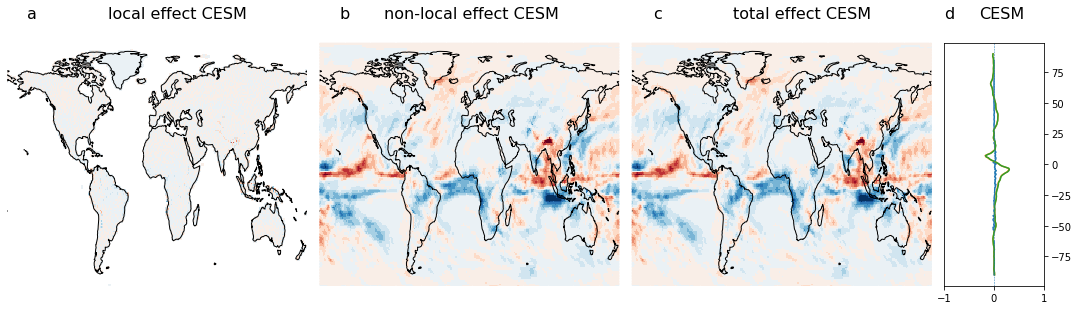

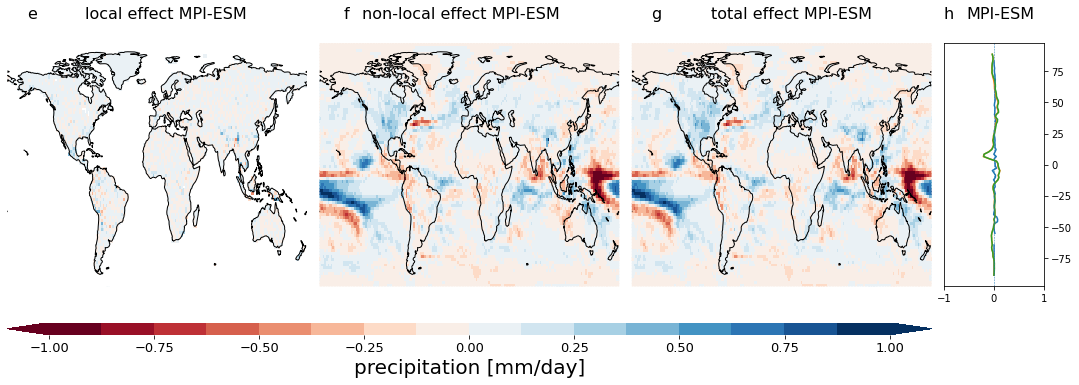

In [3]:


import numpy as np
import os 
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
#from netCDF4 import Dataset as NetCDFFile 
import cartopy.crs as ccrs
import matplotlib.colors as colors
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import mplotutils as mpu

#add panel labels and model names         ax[j-1].text(0.1, 1.15, P_list[j-1], transform=ax.transAxes,fontsize=16, fontweight='bold', va='top', ha='right')

outdir=r'C:/Users/sdeherto/OneDrive - Vrije Universiteit Brussel/phd/LAMACLIMA/wam_data/new/signal_seperated/'
#title='2m air temperature'
plt.rcParams['figure.figsize'] = [18, 7.5]
#matplotlib.rc('xtick', labelsize=20) 
#matplotlib.rc('ytick', labelsize=20) 
mpl.rc('axes',edgecolor='none')
l_vapo = 2450000 #Latent heat of vaporization (J/kg)
outdir=r'C:/Users/sdeherto/OneDrive - Vrije Universiteit Brussel/phd/LAMACLIMA/wam_data/new/signal_seperated/'

case='irr-crop'
season=False 
sensitivity=False
level='none'
relative=False 
vlims=[-1,1]
lat_lims=[-1,1]
model_list=['cesm', 'mpiesm']
var_list=['PRECT','pr']

cmor_list=['Amon','Amon']
#unit='W/m$^{2}$'
unit='mm/day'
label='precipitation'
#nit='/ '
#unit='m$^{-2}$/m$^{-2}$'

lsm_data_CESM = r'C:/Users/sdeherto/OneDrive - Vrije Universiteit Brussel/phd/LAMACLIMA/wam_data/cesm/landmask_cesm.nc'
ds_mask = xr.open_dataset(lsm_data_CESM)
da_mask=ds_mask['landmask']  
  
lsm_data_MPIESM = r'C:/Users/sdeherto/OneDrive - Vrije Universiteit Brussel/phd/LAMACLIMA/wam_data/mpiesm/landmask_mpiesm.nc'# insert landseamask here
ds_mask = xr.open_dataset(lsm_data_MPIESM)
da_mask_mpi=ds_mask['landmask']  
da_mask_mpi=np.flipud(da_mask_mpi)


masks=[da_mask,da_mask_mpi]
k=0
for model in model_list:
    k=k+1
    if model=='cesm':
        var=var_list[0]
        cmor_table=cmor_list[0]
        mask_local=masks[0]
    elif model=='mpiesm':
        var=var_list[1]
        cmor_table=cmor_list[1]
        mask_local=masks[1]


    varname=var
    var_local=var+'_local'
    var_nonlocal=var+'_nonlocal'
    var_total=var+'_total'

    tseriesdir= outdir + '/'+model+'/'
    fn=varname + '_' + case +'_' + model + '_timmean_signal-separated.nc'
    ds = xr.open_dataset(tseriesdir+fn)
    da_local=ds[var_local].mean('time')
    da_nonlocal=ds[var_nonlocal].mean('time')
    da_total=ds[var_total].mean('time')
    
    if model=='mpiesm':
        mask_local=xr.DataArray(mask_local,coords=(da_local.lat,da_local.lon)) 
    i=0
    j=0
    ############ define the projection,
    #f, ax = plt.subplots(2,2)
    fig = plt.figure()
    gs = fig.add_gridspec(2,4,width_ratios=[3,3,3,1])
    label_list=['a','b','c','d','e','f','g','h']
    if model=='ecearth' and var =='slhf':
            da_local=da_local/(3*3600)/(l_vapo*1000)*1000*3600*24
            da_nonlocal=da_nonlocal/(3*3600)/(l_vapo*1000)*1000*3600*24
            da_total=da_total/(3*3600)/(l_vapo*1000)*1000*3600*24
    if model=='mpiesm' and var =='hfls':
            da_local=da_local/(l_vapo*1000)*1000*3600*24
            da_nonlocal=da_nonlocal/(l_vapo*1000)*1000*3600*24
            da_total=da_total/(l_vapo*1000)*1000*3600*24
    if model=='cesm' and var =='LHFLX':
            da_local=da_local/(l_vapo*1000)*1000*3600*24
            da_nonlocal=da_nonlocal/(l_vapo*1000)*1000*3600*24
            da_total=da_total/(l_vapo*1000)*1000*3600*24
    if model=='ecearth' and var =='tp':
            da_local=da_local*3600*24
            da_nonlocal=da_nonlocal*3600*24
            da_total=da_total*3600*24
    if model=='mpiesm' and var =='pr':
            da_local=da_local*3600*24
            da_nonlocal=da_nonlocal*3600*24
            da_total=da_total*3600*24
    if model=='cesm' and var =='PRECT':
            da_local=da_local*1000*3600*24
            da_nonlocal=da_nonlocal*1000*3600*24
            da_total=da_total*1000*3600*24
    name = da_total.name
    for da in [da_local, da_nonlocal, da_total]:
        cmap = 'RdBu'
        i=i+1
    #     da_mean=xr.where(da_mask==1,da_mean,0)
        if vlims==False:
                plot_lims = [da.min(), da.max()]
        else:
                plot_lims = [vlims[0],vlims[1]]
    # define colorbar levels
        ax = fig.add_subplot(gs[k-1,j], projection=ccrs.PlateCarree())
        levels = np.arange(plot_lims[0], plot_lims[1]+20, 20)
        levels=[-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2]
    # define colormap (more info on colormaps: https://matplotlib.org/users/colormaps.html)

          #cmap, norm = mpu.from_levels_and_cmap(levels, 'RdBu_r', extend='both')
        cbar_label = unit

           # add the coastlines to the plot

        ax.coastlines()
        # plot data array as a map, with the previously defined argumnets
        h=da.plot(ax=ax, cmap=plt.cm.get_cmap(cmap, 16), vmin=plot_lims[0], vmax=plot_lims[1], add_colorbar=False)
        # plot the colorbar with all predefined arguments
        if plot_lims[0]>da.min() and plot_lims[1]<da.max():
            extend='both'
        elif plot_lims[0]>da.min() and plot_lims[1]> da.max():
            extend='min'
        elif plot_lims[0]<da.min() and plot_lims[1]<da.max():
            extend='max'
        else:
            extend='neither'
        if k==1:
            if i==1:
                cesm_local_extend=extend
                ax.set_ylabel(model)
            elif i==2:
                cesm_nonlocal_extend=extend
            elif i==3:
                cesm_total_extend=extend
        elif k==2:
            if i==1:
                mpiesm_local_extend=extend
            elif i==2:
                mpiesm_nonlocal_extend=extend
            elif i==3:
                mpiesm_total_extend=extend
        elif k==3:
            if i==1:
                ecearth_local_extend=extend
            elif i==2:
                ecearth_nonlocal_extend=extend
            elif i==3:
                ecearth_total_extend=extend
        #if j==4:
        #cbar   = fig.colorbar(h, ax=ax, cmap=cmap,spacing='uniform',orientation='horizontal',label = cbar_label,pad = 0.05,extend=extend)
        #extend='both'
          # add the title
        #ax.set_title(title)
          # adjust colorbar extent to axes extent

        ax.set_aspect('auto')
     # set the extent of the cartopy geoAxes to \"global\"
          #ax.set_global()

          # or alternatively, if you want to plot a certain region, use (example: Europe)
        ax.set_extent([-180, 180, -63, 89], ccrs.PlateCarree())

        levels = [0, 3.2, 5]
        if i==1:
            ax_1=ax
            if model=='cesm':
                ax.text(0.1, 1.15, 'a', transform=ax.transAxes,fontsize=16, va='top', ha='right')
                ax.text(0.8, 1.15, 'local effect CESM', transform=ax.transAxes,fontsize=16, va='top', ha='right')
            elif model=='mpiesm':
                ax.text(0.1, 1.15, 'e', transform=ax.transAxes,fontsize=16, va='top', ha='right')
                ax.text(0.8, 1.15, 'local effect MPI-ESM', transform=ax.transAxes,fontsize=16, va='top', ha='right')
            elif model=='ecearth':
                ax.text(0.1, 1.15, 'i', transform=ax.transAxes,fontsize=16, va='top', ha='right')
                ax.text(0.8, 1.15, 'local effect EC-EARTH', transform=ax.transAxes,fontsize=16, va='top', ha='right')
            
        elif i==2:
            if model=='cesm':
                ax.text(0.1, 1.15, 'b', transform=ax.transAxes,fontsize=16, va='top', ha='right')
                ax.text(0.8, 1.15, 'non-local effect CESM', transform=ax.transAxes,fontsize=16, va='top', ha='right')

            elif model=='mpiesm':
                ax.text(0.1, 1.15, 'f', transform=ax.transAxes,fontsize=16,va='top', ha='right')
                ax.text(0.8, 1.15, 'non-local effect MPI-ESM', transform=ax.transAxes,fontsize=16, va='top', ha='right')
            elif model=='ecearth':
                ax.text(0.1, 1.15, 'j', transform=ax.transAxes,fontsize=16,va='top', ha='right')
                ax.text(0.9, 1.15, 'non-local effect EC-EARTH', transform=ax.transAxes,fontsize=16, va='top', ha='right')
        elif i==3:
            if model=='cesm':
                ax.text(0.1, 1.15, 'c', transform=ax.transAxes,fontsize=16, va='top', ha='right')
                ax.text(0.8, 1.15, 'total effect CESM', transform=ax.transAxes,fontsize=16, va='top', ha='right')

            elif model=='mpiesm':
                ax.text(0.1, 1.15, 'g', transform=ax.transAxes,fontsize=16, va='top', ha='right')
                ax.text(0.8, 1.15, 'total effect MPI-ESM', transform=ax.transAxes,fontsize=16, va='top', ha='right')
            elif model=='ecearth':
                ax.text(0.1, 1.15, 'k', transform=ax.transAxes,fontsize=16, va='top', ha='right')
                ax.text(0.8, 1.15, 'total effect EC-EARTH', transform=ax.transAxes,fontsize=16, va='top', ha='right')
          # ax.set_extent([-13, 43, 35, 70], ccrs.PlateCarree())
          # save the figure, adjusting the resolution
            ax_2=ax
        
        j=j+1
    
    ax = fig.add_subplot(gs[k-1,j])    
    dalat_local=da_local.mean(dim='lon')
    dalat_nonlocal=da_nonlocal.mean(dim='lon')
    dalat_total=da_total.mean(dim='lon')
    ax.plot(dalat_local[:],dalat_local.lat,label='local signal')   #adapt colors to different flavours of same color
    ax.plot(dalat_nonlocal[:],dalat_nonlocal.lat,label='non-local signal')
    ax.plot(dalat_total[:],dalat_total.lat,label='total signal')
    plt.xlim([plot_lims[0], plot_lims[1]])
    plt.xlim([lat_lims[0],lat_lims[1]])
    #ax.set_ylabel('Latitude (°)')
    ax.yaxis.set_ticks_position('right')
    if model=='cesm':
        ax.text(0.1, 1.15, 'd', transform=ax.transAxes,fontsize=16, va='top', ha='right')
        ax.text(0.8, 1.15, 'CESM', transform=ax.transAxes,fontsize=16, va='top', ha='right')
    elif model=='mpiesm':
        ax.text(0.1, 1.15, 'h', transform=ax.transAxes,fontsize=16, va='top', ha='right')
        ax.text(0.9, 1.15, 'MPI-ESM', transform=ax.transAxes,fontsize=16, va='top', ha='right')
    elif model=='ecearth':
        ax.text(0.05, 1.15, 'l', transform=ax.transAxes,fontsize=16, va='top', ha='right')
        ax.text(0.95, 1.15, 'EC-EARTH', transform=ax.transAxes,fontsize=16, va='top', ha='right')
    #yticks().set_ticks_position('right')
    ax.axvline(x=0,linewidth=0.5,linestyle='dashed')
    ax.spines['bottom'].set_color('black')
    ax.spines['top'].set_color('black') 
    ax.spines['right'].set_color('black')
    ax.spines['left'].set_color('black')   
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)

    if k==3:
        ax.legend(bbox_to_anchor=(1.4, -0.15),edgecolor='none',prop={'size': 12})
    fig.subplots_adjust(left=0.1, right=0.9,bottom=0.05, top=0.95,hspace=0., wspace=0.05)
    #fig.tight_layout()
#plt.show()

extend_list=[cesm_local_extend,cesm_nonlocal_extend,cesm_total_extend,mpiesm_local_extend,mpiesm_nonlocal_extend,mpiesm_total_extend]
if extend_list.count('both')>0:
    extend='both'
elif extend_list.count('min')>0 and extend_list.count('max')>0:
    extend='both'
elif extend_list.count('min')>0:
    extend='min'
elif extend_list.count('max')>0:
    extend='max'
else:
    extend='neither'
cbar = mpu.colorbar(h, ax1=ax_1,ax2=ax_2, shift=0., size=0.05, orientation='horizontal',extend=extend,label=cbar_label)
cbar.set_label(label+' ['+unit+']', size=20)
cbar.ax.tick_params(labelsize=13) 
#fig.tight_layout()



     